In [23]:
import numpy as np
import plots_lib as _plt
import pandas as pd

std_var_df = pd.read_csv('amazon-books-continuous-standardised.csv', index_col=0)
df = pd.read_csv('amazon-books-factorial.csv', index_col=0)
lambdas = np.array(pd.read_csv('amazon-books-eigenvalues.csv', index_col=0))
print(lambdas.shape)
lambdas = lambdas.reshape((lambdas.shape[1],))
p = lambdas.shape[0]
F = np.array(df[[f'F{idx}' for idx in range(p)]])
eigenvectors = pd.read_csv('amazon-books-eigenvector.csv', index_col=0)

active_var_label = ['listPrice', 'amazonPrice','weight','width']
df.head()
n, p = F.shape[0], F.shape[1] 

print(n, p)


(1, 4)
311 4


### PCA Variables analysis with the prices as active variables

#### we find back the correlation with the axis and the variables using the transition relation: $$corr(F_{\alpha}, V_j) = \sqrt{\lambda_\alpha}*u_{\alpha j}$$


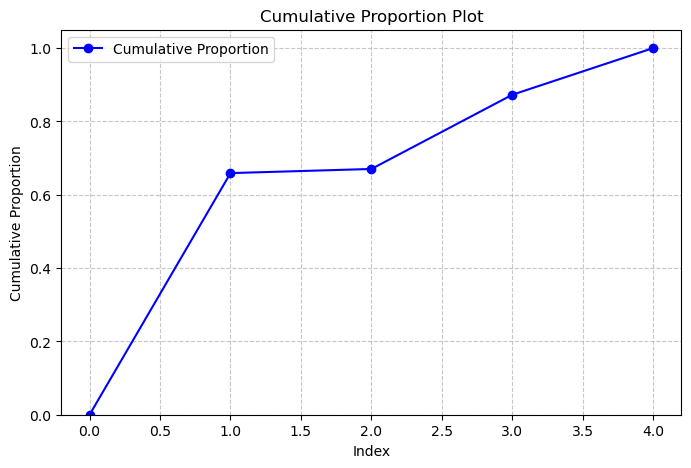

[2.62735722 0.04501923 0.80706016 0.50770166]


In [24]:
eigenvectors = np.array(eigenvectors)
_plt.plot_cumulative_proportion(lambdas)
print(lambdas)

In [25]:
sqrt_lambdas = np.sqrt(lambdas)

var_F_corr = eigenvectors * sqrt_lambdas
contribution = eigenvectors**2
cos2 = var_F_corr**2

contribution_label = [f'CONTR_{i}' for i in range(len(contribution))]
factorial_axis_label = [f'F{i}' for i in range(len(var_F_corr))]
cos2_label = [f'COS2_{i}' for i in range(len(var_F_corr))]
concat_label = factorial_axis_label + contribution_label + cos2_label
concat = np.concatenate((var_F_corr, contribution, cos2), axis=1)
df = pd.DataFrame(concat, index=active_var_label, columns=concat_label)
df

,F0,F1,F2,F3,CONTR_0,CONTR_1,CONTR_2,CONTR_3,COS2_0,COS2_1,COS2_2,COS2_3
listPrice,0.920110,0.153091,0.355753,-0.013581,0.322226,0.520594,0.156816,0.000363,0.846603,0.023437,0.126560,0.000184
amazonPrice,0.893659,-0.146556,0.420300,-0.005223,0.303966,0.477097,0.218883,0.000054,0.798627,0.021479,0.176652,0.000027
weight,0.695782,-0.008493,-0.517301,-0.494974,0.184258,0.001602,0.331575,0.482565,0.484113,0.000072,0.267601,0.244999
width,0.705702,-0.005641,-0.486053,0.512339,0.189550,0.000707,0.292725,0.517018,0.498015,0.000032,0.236247,0.262491


In [26]:
# checking that sum of cos2 for a variable on all axis == 1
# df[cos2_label].sum(axis=1)

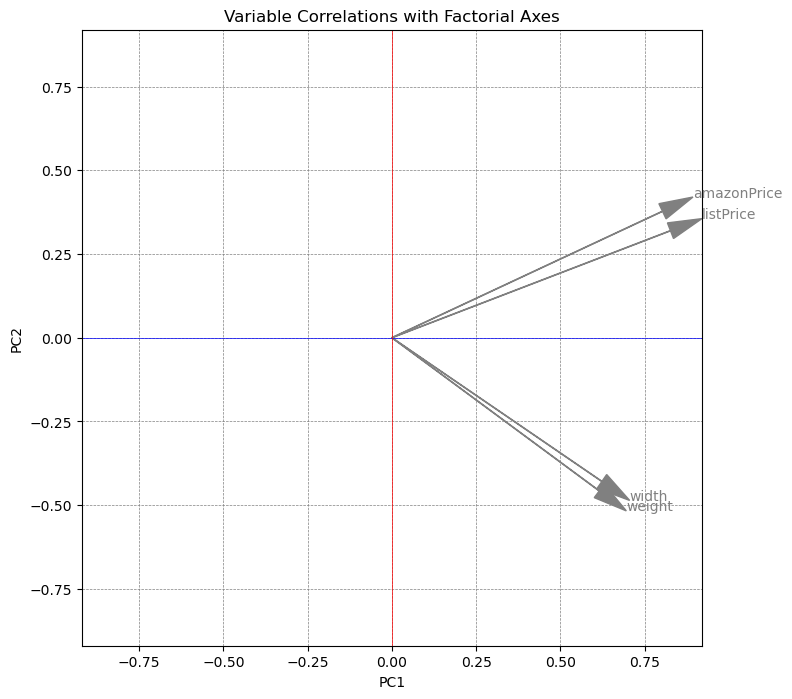

In [27]:
_plt.plot_variables(var_F_corr[:, [0,2]], active_var_label)

### Im suspicious about the correlation between the amazonPrice and the width variable
- lets display their respective representation and approximate their real correlation on the two first factor

In [28]:
# we are in a normalised PCA so sum of all the coordinate of the variable should be equale to their variance i.e 1
(df[factorial_axis_label]**2).sum(axis=1)

df['CONTR_0'].sum()

0.9999999999999998

In [29]:
df[contribution_label + cos2_label].loc[['amazonPrice', 'width']]

,CONTR_0,CONTR_1,CONTR_2,CONTR_3,COS2_0,COS2_1,COS2_2,COS2_3
amazonPrice,0.303966,0.477097,0.218883,0.000054,0.798627,0.021479,0.176652,0.000027
width,0.189550,0.000707,0.292725,0.517018,0.498015,0.000032,0.236247,0.262491


In [30]:
test = np.array(df[factorial_axis_label].loc[['amazonPrice', 'width']])
test.shape
corr = test[0, 0:2] * test[1, 0:2]
print(np.sum(corr))

0.6314833544342068


#### Pourquoi sur les deux premiers axes on a une correlation approximé de 0.64 alors que mon graphique montre deux vecteur quasi colineaire?? 

In [31]:
test = np.array(df[['F0', 'F1']].loc[['amazonPrice', 'width']])
test = np.sum(test[0] * test[1])
print(test)

0.6314833544342068


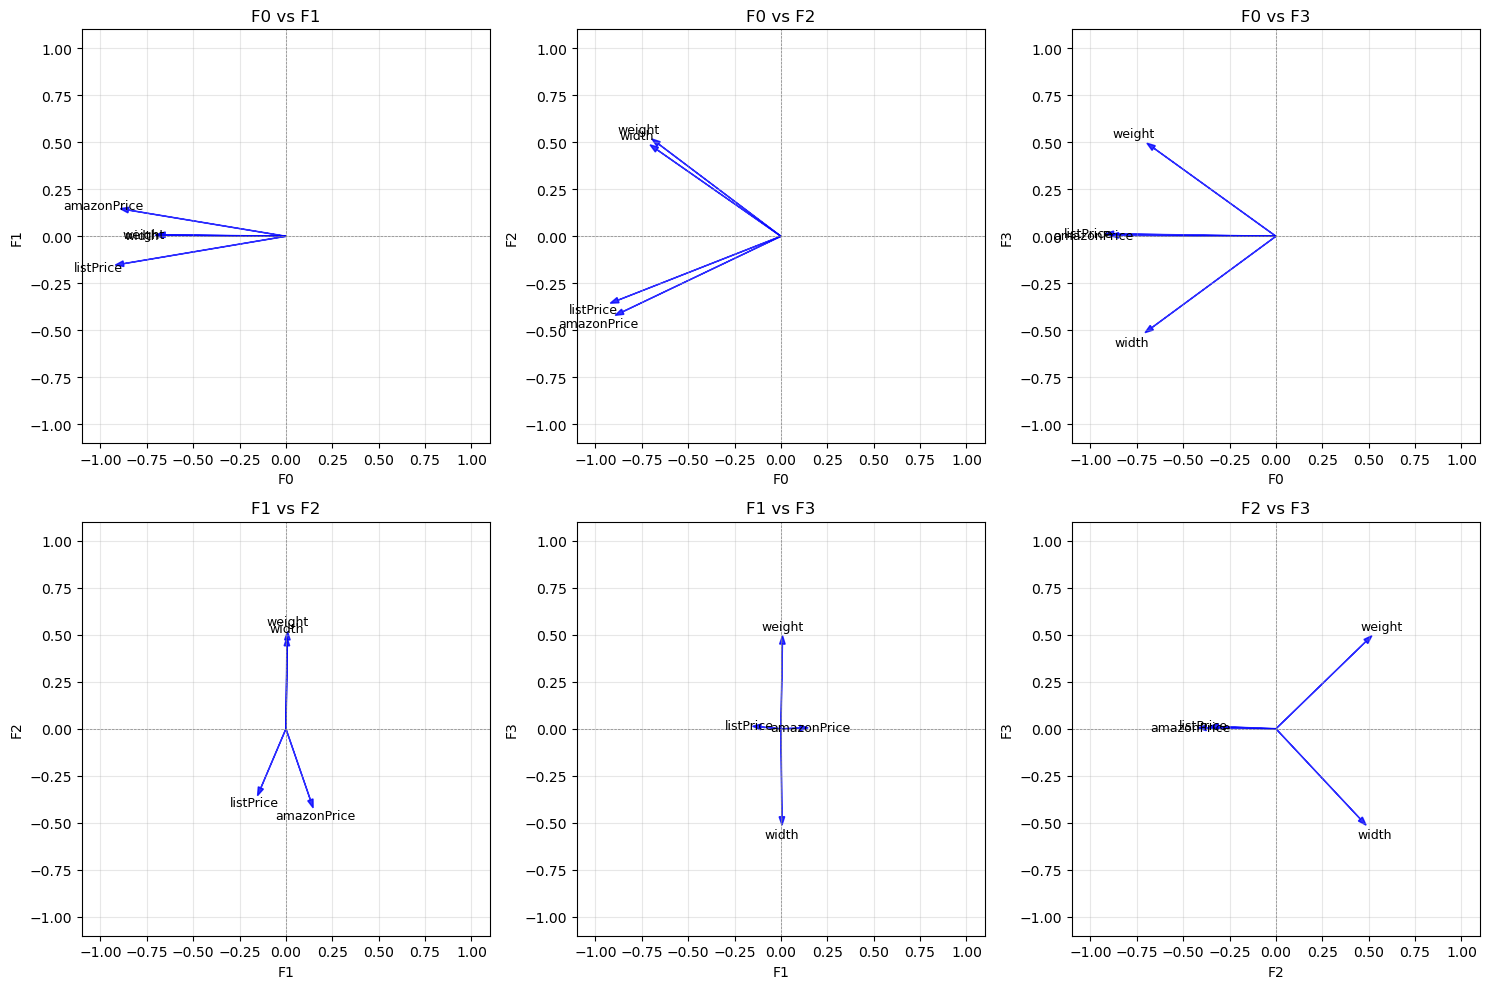

In [32]:
_plt.display_pairplot_with_arrows(df[factorial_axis_label]*-1)